# Phân loại khách hàng để hỗ trợ marketing.

## I.Mô tả dữ liệu:

### 1. Giới thiệu Dataset
- Dataset: [**Online Retail** (UCI Machine Learning Repository)](https://archive.ics.uci.edu/dataset/352/online+retail)  
- Nội dung: ghi lại toàn bộ giao dịch của một công ty bán hàng trực tuyến tại Anh từ **01/12/2010 – 09/12/2011**.  
- Định dạng: Excel `.xlsx`.  

### 2. Các cột dữ liệu chính
- **InvoiceNo**: Mã hóa đơn (có thể có hóa đơn hủy nếu bắt đầu bằng `C`).  
- **StockCode**: Mã sản phẩm.  
- **Description**: Mô tả sản phẩm.  
- **Quantity**: Số lượng sản phẩm trong đơn (có thể âm khi trả hàng).  
- **InvoiceDate**: Ngày giờ giao dịch.  
- **UnitPrice**: Giá mỗi sản phẩm (bảng Anh).  
- **CustomerID**: Mã khách hàng (có giá trị thiếu).  
- **Country**: Quốc gia nơi khách hàng mua hàng.  

### 3. Dữ liệu đầu vào (Input)
- Dữ liệu gốc: `Online Retail.xlsx`.  
- Sau tiền xử lý, ta xây dựng các đặc trưng RFM cho từng khách hàng:  
  - **Recency (R)**: Số ngày kể từ lần mua gần nhất.  
  - **Frequency (F)**: Số lần mua hàng (số hóa đơn).  
  - **Monetary (M)**: Tổng số tiền khách hàng đã chi tiêu.  

### 4. Kết quả mong đợi (Output)
- **Clustering (KMeans):** Phân chia khách hàng thành các nhóm (ví dụ: Loyal, Potential, Churn).  
- **Classification (Random Forest, Logistic Regression, SVM, KNN):**  
  Huấn luyện mô hình để phân loại khách hàng mới vào nhóm phù hợp.  
- **Kết quả trực quan:**  
  - Biểu đồ phân bố R, F, M.  
  - Scatter plot phân cụm khách hàng.  
  - Feature importance của các mô hình ML.  
  - Confusion Matrix và Classification Report để đánh giá mô hình.  

### 5. Ứng dụng thực tế
- Xác định khách hàng trung thành để triển khai chương trình ưu đãi.  
- Phát hiện khách hàng có nguy cơ rời bỏ để có chiến dịch giữ chân.  
- Tối ưu hóa chiến lược marketing theo từng nhóm khách hàng.  


## II. Phân tích dữ liệu khám phá

### 1. Khai báo thư viện

In [2]:
import pandas as pd
import numpy as np
from IPython import display
import warnings

%matplotlib inline

warnings.filterwarnings("ignore")

### 2. Nạp dữ liệu

Vì dữ liệu lớn nên ta phải export file excel sang csv để đọc cho lẹ, dùng **encoding** là latin1, ISO-8859-1, hoặc cp1252 (nếu file được export từ Excel trên Windows).

In [3]:
data_path = "data/Online Retail.csv"
df = pd.read_csv(data_path, encoding="latin1")

### 3. Phân tích dữ liệu

#### 3.1 Thống kê mô tả

Hiển thị một số thông tin về dữ liệu

In [4]:
# shape
print(f"Shape: {df.shape}")
# types
print(f"Data Types:\n{df.dtypes}")
# head, tail
print("Contents:")
display.display(df.head(5))
display.display(df.tail(5))
# info
df.info()

Shape: (541909, 8)
Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
Contents:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Nhận xét**
+ Dataset có 541.909 dòng, 8 cột, khá lớn.
+ Cột **CustomerID** bị thiếu khá nhiều (~25%)
+ Cột **Quantity** có thể có giá trị âm (trả hàng)
+ Cột **UnitPrice** có thể bằng 0 (lỗi dữ liệu)
+ Cột **InvoiceDate** cần chuyển sang datetime

=> Cần làm sạch dữ liệu trước khi tính RFM và áp dụng mô hình ML.

In [5]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df[df.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


+ Có giá trị Nan: True


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


+ Số dòng trùng: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


**Nhận xét** 
+ Có nhiều dòng bị trùng lắp, có giá trị Null, Nan

#### 3.2 Các tính chất thống kê trên dữ liệu số
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [6]:
description = df.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**Nhận xét**
+ Quantity: có giá trị âm, đa số khách hàng mua <= 10 sản phẩm/giao dịch, những giá trị lớn hơn có khả năng cao là outlier(giá trị ngoại lại) so với hành vi bình thường  → dữ liệu trả hàng, cần xử lý/loại bỏ.
+ UnitPrice: có giá trị <= 0 và giá thường <= 4.13, nên các giá còn lại có khả năng lỗi rất cao → dữ liệu lỗi.
+ CustomerID: thiếu ~135k bản ghi (chỉ có 406.829/541.909 dòng có ID) -> dữ liệu bị thiếu cần bị xóa bỏ.

=> Dataset chứa nhiều outlier và dữ liệu không hợp lệ, cần làm sạch trước khi phân tích.

### 4. Làm sạch dữ liệu

#### 4.1 Xử lí giá trị bị thiếu

Vì những cột có giá trị bị thiếu như CustomerID,Quantity, UnitPrice, InvoiceDate,... không có giá trị mặc định nên ta sẽ xóa hết tất cả  

In [7]:
df.dropna(inplace=True, subset=["CustomerID"])
print(f"Shape after dropna: {df.shape}")

Shape after dropna: (406829, 8)


#### 4.2 Xử lí hóa đơn bị hủy

In [8]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

print(f"Size after remove canceled order {df.size}")

Size after remove canceled order 3183392


#### 4.3 Xử lí giá trị ngoại lai của Quantity và UnitPrice

In [9]:
# Loại bỏ Quantity <= 0 (trả hàng, lỗi)
df = df[df["Quantity"] > 0]

# Loại bỏ Quantity quá lớn > 10
df = df[df["Quantity"] <= 10]

# Loại bỏ UnitPrice <= 0 (giá lỗi, âm hoặc bằng 0)
df = df[df["UnitPrice"] > 0]

# Loại bỏ UnitPrice quá cao (> 4.13) vì phần lớn giá cả ở mốc <= 4.13
df = df[df["UnitPrice"] <= 4.13]

print(f"Size after remove invalid value {df.size}")
df.describe()

Size after remove invalid value 1554528


,Quantity,UnitPrice,CustomerID
count,194316.000000,194316.000000,194316.000000
mean,4.005254,1.927361,15504.916970
std,2.915109,0.973414,1675.324715
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,14159.000000
50%,3.000000,1.690000,15518.000000
75%,6.000000,2.550000,16942.000000
max,10.000000,4.130000,18287.000000


#### 4.4 Chuyển InvoiceDate sang datetime

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

### 5. Chuyển đổi sang RFM

#### 5.1 Tính toán

Tạo cột tính tổng tiền

In [11]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Tính toán RFM

In [12]:
# Ngày tham chiếu (max date + 1 ngày)
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# Tính RFM
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                              # Frequency
    "TotalPrice": "sum"                                  # Monetary
}).reset_index()

# Đổi tên cột
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Xem top 10 khách hàng
print(rfm.head(10))

   CustomerID  Recency  Frequency  Monetary
0     12347.0        2          7    862.02
1     12349.0       19          1    313.44
2     12350.0      310          1     26.20
3     12352.0       36          6    259.53
4     12353.0      204          1     29.30
5     12354.0      232          1    257.55
6     12355.0      214          1     53.10
7     12356.0      246          1     55.71
8     12357.0       33          1    167.10
9     12358.0      151          1     32.70


#### 5.2 Biểu đồ

##### 5.2.1 Biểu đồ Histogram

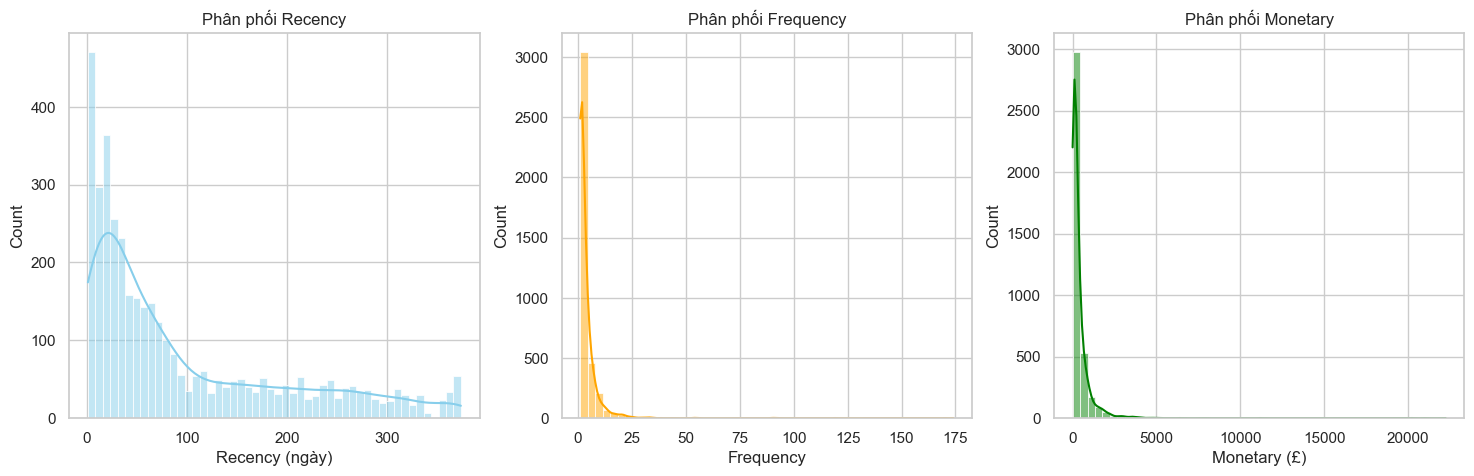

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm["Recency"], bins=50, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Phân phối Recency")
axes[0].set_xlabel("Recency (ngày)")

sns.histplot(rfm["Frequency"], bins=50, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Phân phối Frequency")
axes[1].set_xlabel("Frequency")

sns.histplot(rfm["Monetary"], bins=50, kde=True, ax=axes[2], color="green")
axes[2].set_title("Phân phối Monetary")
axes[2].set_xlabel("Monetary (£)")

plt.show()


**Nhận xét**
+ Recency: Phân phối lệch phải, đa số khách hàng mua hàng gần đây (nhiều khách Recency nhỏ), ít khách lâu không quay lại.
+ Frequency: Rất lệch phải, phần lớn khách mua rất ít lần, chỉ có số ít mua nhiều lần.
+ Monetary: Cũng lệch phải mạnh, đa số chi tiêu ít, chỉ một số ít khách chi tiêu rất lớn.

=> Nhìn chung, cả 3 biến trong RFM đều có phân phối không cân đối, tập trung vào giá trị nhỏ, chỉ có một số ít khách hàng có giá trị cao (outlier).

##### 5.2.2 Biểu đồ Heatmap

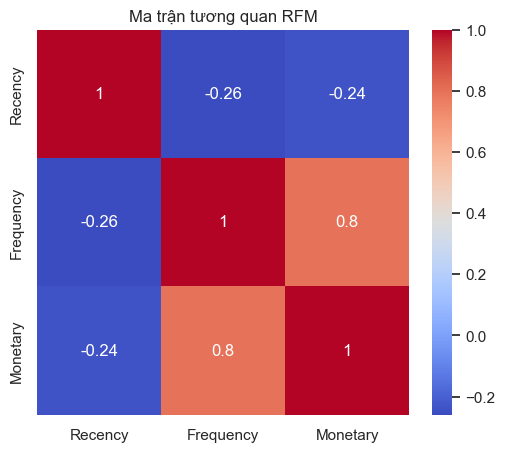

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(rfm[["Recency","Frequency","Monetary"]].corr(), annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan RFM")
plt.show()


**Nhận xét**
+ Recency có tương quan âm nhẹ với Frequency (-0.26) và Monetary (-0.23): khách mua gần đây thường mua nhiều hơn và chi tiêu nhiều hơn.
+ Frequency và Monetary có tương quan dương rất mạnh (0.81): khách mua nhiều lần thường cũng chi tiêu nhiều tiền.

=> Recency ảnh hưởng ngược chiều, còn Frequency và Monetary có mối liên hệ chặt chẽ.

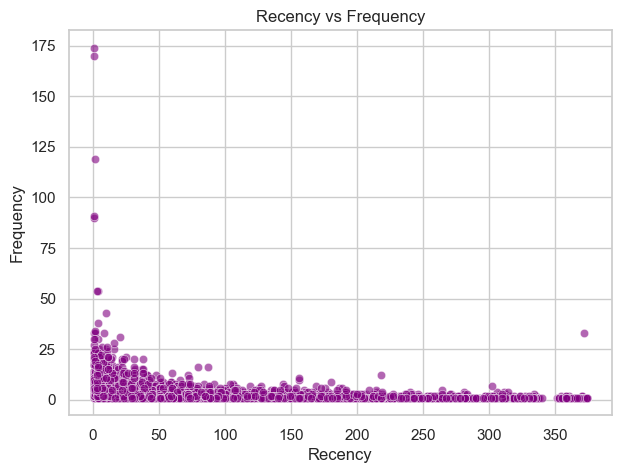

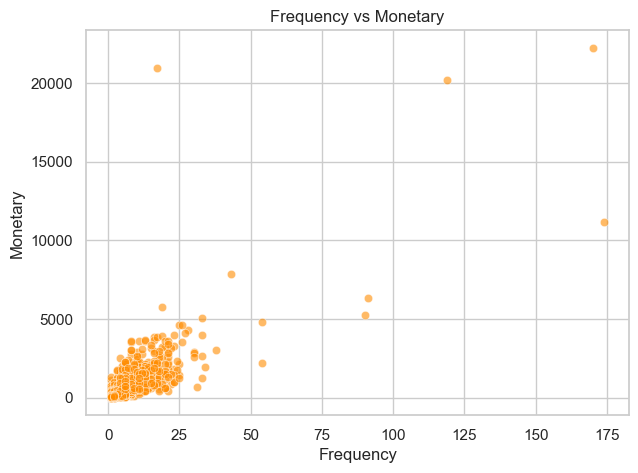

In [15]:
# Recency vs Frequency
plt.figure(figsize=(7,5))
sns.scatterplot(x="Recency", y="Frequency", data=rfm, alpha=0.6, color="purple")
plt.title("Recency vs Frequency")
plt.show()

# Frequency vs Monetary
plt.figure(figsize=(7,5))
sns.scatterplot(x="Frequency", y="Monetary", data=rfm, alpha=0.6, color="darkorange")
plt.title("Frequency vs Monetary")
plt.show()


**Nhận xét**
+ Recency vs Frequency: Có xu hướng nghịch biến, khách hàng mua gần đây (Recency nhỏ) thường mua nhiều lần hơn. Khi Recency tăng, Frequency giảm rõ rệt.
+ Frequency vs Monetary: Có mối quan hệ đồng biến, khách mua hàng nhiều lần thường chi tiêu nhiều hơn. Tuy nhiên, tồn tại một số outlier với chi tiêu cực lớn so với số đông.

=> Nhìn chung, dữ liệu phản ánh đúng logic kinh doanh: khách hàng mua gần đây và mua nhiều lần thì cũng thường là nhóm mang lại doanh thu cao.

## III Chia dữ liệu thực nghiệm

### 1. Gán nhãn với KMeans

In [16]:
from sklearn.cluster import KMeans

X = rfm[["Recency", "Frequency", "Monetary"]]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(X)

Tính trung bình RFM theo cụm

In [17]:
cluster_summary = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)
print("RFM trung bình theo cụm:\n", cluster_summary)

RFM trung bình theo cụm:
          Recency  Frequency  Monetary
Cluster                              
0         109.22       2.37    184.03
1           2.33     102.00  21115.22
2          29.59       8.41   1142.83
3          16.32      25.18   3671.36


**Gán nhãn kinh doanh dựa trên đặc trưng RFM**
+ 1. **Loyal (Trung thành)**
    + Recency thấp (mới mua gần đây).
    + Frequency cao (mua thường xuyên).
    + Monetary cao (chi tiêu nhiều).
    
=> Đây là nhóm VIP cần giữ chân, chăm sóc đặc biệt.

+ 2. **Churn (Rời bỏ)**
    + Recency cao (lâu rồi chưa quay lại).
    + Frequency thấp (ít mua).
    + Monetary thấp (chi tiêu ít).

=> Nhóm có nguy cơ mất khách, cần chiến dịch khuyến mãi để kéo lại.

+ 3. **New Customers (Khách mới)**
    + Recency thấp (vừa mới mua gần đây).
    + Frequency thấp (chưa mua nhiều).
    + Monetary chưa cao.

=> Nhóm này cần nuôi dưỡng để biến thành khách trung thành.

+ 4. **Potential (Tiềm năng)**
    + Recency trung bình.
    + Frequency trung bình.
    + Monetary trung bình.

=> Nhóm có khả năng tăng trưởng, cần thúc đẩy bằng marketing/cross-sell.


In [18]:
labels_map = {}
for cluster_id, row in cluster_summary.iterrows():
    if row["Frequency"] >= cluster_summary["Frequency"].median() and row["Monetary"] >= cluster_summary["Monetary"].median() and row["Recency"] <= cluster_summary["Recency"].median():
        labels_map[cluster_id] = "Loyal"
    elif row["Recency"] <= cluster_summary["Recency"].median() and row["Frequency"] < cluster_summary["Frequency"].median():
        labels_map[cluster_id] = "New Customers"
    elif row["Recency"] > cluster_summary["Recency"].median() and row["Frequency"] <= cluster_summary["Frequency"].median():
        labels_map[cluster_id] = "Churn"
    else:
        labels_map[cluster_id] = "Potential"

rfm["Segment"] = rfm["Cluster"].map(labels_map)

print("\nPhân bổ khách hàng theo nhóm:")
print(rfm["Segment"].value_counts())


Phân bổ khách hàng theo nhóm:
Segment
Churn    3835
Loyal      59
Name: count, dtype: int64


### 2. Lưu dữ liệu

In [19]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib  

X = rfm[["Recency", "Frequency", "Monetary"]]
y = rfm["Segment"]

# Encode nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Chia tập
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print("Mapping nhãn:", dict(zip(le.classes_, le.transform(le.classes_))))

# Lưu thông tin
save_dir = "exps/online_retail"
if os.path.exists(save_dir) is False:
    os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
rfm.to_csv(f'{save_dir}/rfm.csv', index=False)
# Save encoders
joblib.dump(le, f"{save_dir}/label_encoder.joblib")

os.listdir(save_dir)


Mapping nhãn: {'Churn': np.int64(0), 'Loyal': np.int64(1)}


['data.npz', 'label_encoder.joblib', 'rfm.csv']

In [20]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [21]:
pd.read_csv(f'{save_dir}/rfm.csv')

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12347.0,2,7,862.02,2,Churn
1,12349.0,19,1,313.44,0,Churn
2,12350.0,310,1,26.20,0,Churn
3,12352.0,36,6,259.53,0,Churn
4,12353.0,204,1,29.30,0,Churn
...,...,...,...,...,...,...
3889,18280.0,278,1,104.30,0,Churn
3890,18281.0,181,1,31.80,0,Churn
3891,18282.0,8,2,77.99,0,Churn
3892,18283.0,4,16,1921.75,2,Churn


In [22]:
joblib.load(f'{save_dir}/label_encoder.joblib').classes_

array(['Churn', 'Loyal'], dtype=object)

# Kết thúc